In [1]:
# Standart
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
from tqdm.auto import tqdm

# Graphics
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff

# Graphics size
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

# Timeseries
import time_series

In [2]:
# Data
df = pd.read_csv('Test_data/climat.csv')[['date', 'meantemp']].rename(columns={'date': 'ds', 'meantemp': 'y'})
print(len(df))
df.head()

1462


,ds,y
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000


# Base

### init

In [3]:
# __init__
temperature_ts = time_series.time_series(df)

## Make predict 

### 1. With our params 

In [4]:
# Predict next = 30 days
temperature_ts.set_inteval(60)
# Size of validation data = 30
temperature_ts.set_test_size(60)
# Interval width = 0.95
temperature_ts.set_interval_width(0.95)
# Chouse loss func = MAPE
temperature_ts.set_loss('MAPE')
# Set custom date of test data = 2016-09-24
# temperature_ts.set_custom_test_size('2016-09-24') 
# Set our params of predict model
temperature_ts.set_model_parameters({'changepoint_prior_scale': 0.01, 
                                     'seasonality_prior_scale': 0.01, 
                                     'holidays_prior_scale': 0.1, 
                                     'seasonality_mode': 'multiplicative', 
                                     'changepoint_range': 0.8})  

In [5]:
temperature_ts.init_and_predict_prophet()

00:01:29 - cmdstanpy - INFO - Chain [1] start processing
00:01:29 - cmdstanpy - INFO - Chain [1] done processing


### 2. With GridSearch

In [6]:
import logging
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)

In [ ]:
temperature_ts.search_params()

In [ ]:
temperature_ts.init_and_predict_prophet()

## <span style="color:red">Show components of ts</span>

## Show graphs

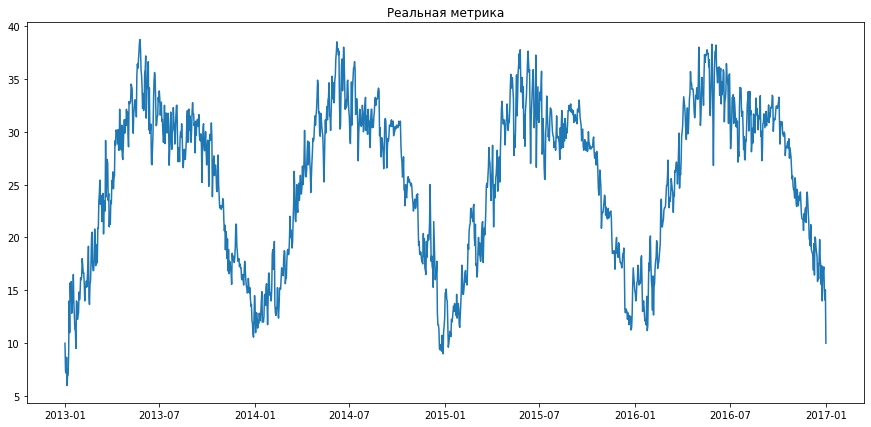

In [7]:
temperature_ts.draw_timeseries()

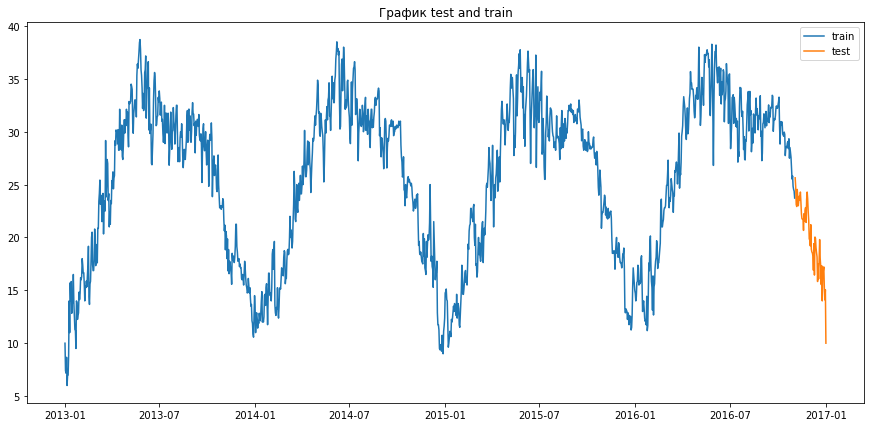

In [8]:
temperature_ts.draw_test_and_train_dataset()

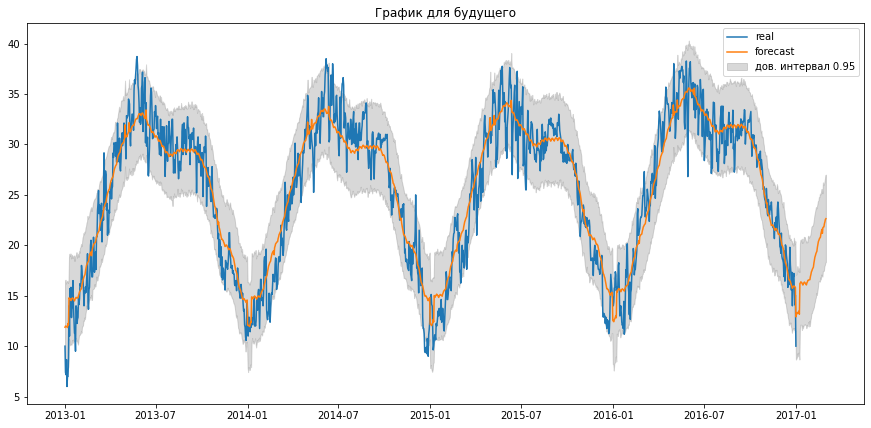

In [9]:
temperature_ts.draw_forecast()

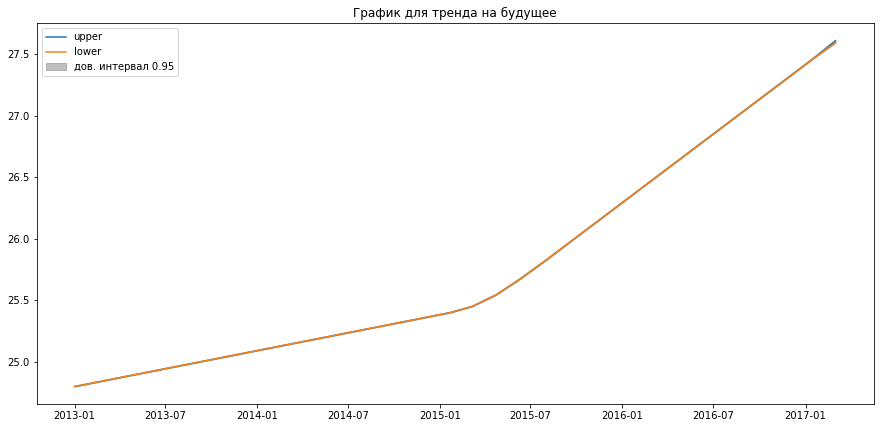

In [10]:
temperature_ts.draw_trend()

In [11]:
# temperature_ts.draw_table_of_future_trend()

## Auto_predict

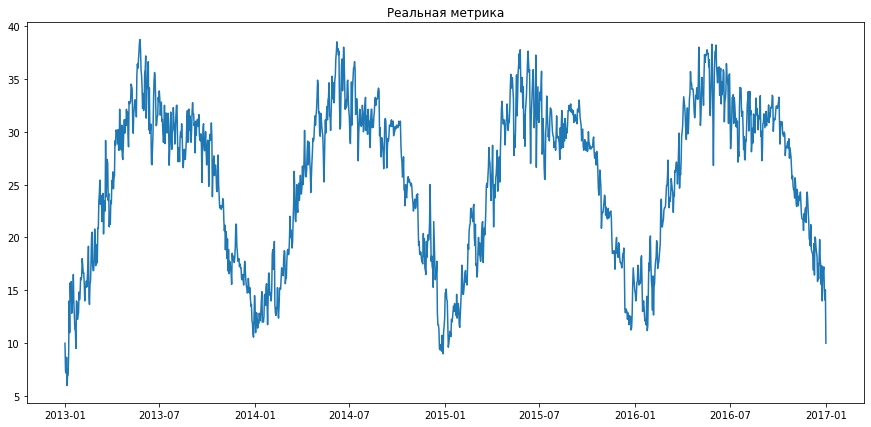

  0%|          | 0/288 [00:00<?, ?it/s]

Ошибки на валидации:
MSE = 1.9941428894100013
MAE = 1.1525661666420277
MAPE = 0.06321014685312652
Текущие параметры после gridSearch:

changepoint_prior_scale = 0.05
seasonality_prior_scale = 0.01
holidays_prior_scale = 10.0
seasonality_mode = multiplicative
changepoint_range = 0.8


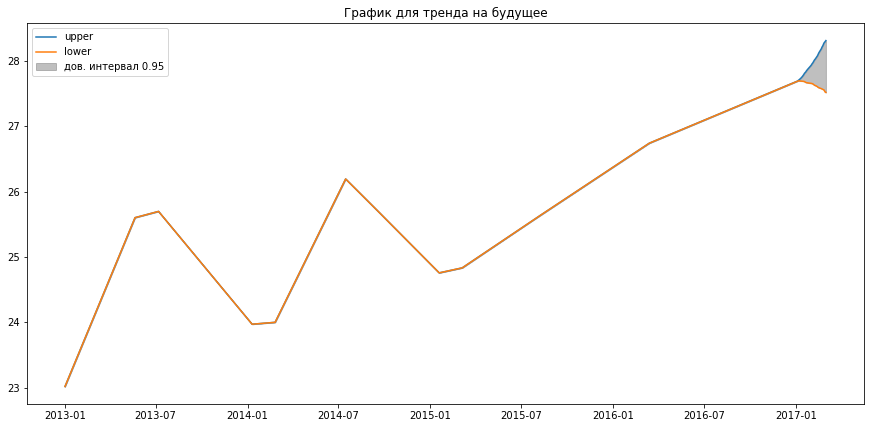

Ожидаемый прирост в следующем квратале с учетом тренда, исходя из ошибки модели на валидации


,Нижняя граница прогноза,Нижняя граница прогноза (с поправкой на ошибку модели),Нижняя граница прогноза в %,Нижняя граница прогноза (с поправкой на ошибку модели) в %,Верхняя граница прогноза,Верхняя граница прогноза (с поправкой на ошибку модели),Верхняя граница прогноза в %,Верхняя граница прогноза (с поправкой на ошибку модели) в %
0,27.6354,25.8885,0.3849,-5.9605,27.951,29.7178,1.5315,7.9493


In [12]:
temperature_ts.to_vanga()

##  <span style="color:red">Decompose</span>

##  <span style="color:red">Anomalys</span>